In [1]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot

In [2]:
data_edge = pd.read_csv('./road network in CA/edge.txt', sep=' ')

print('Number of rows = %d' % (data_edge.shape[0]))
print('Number of attributes = %d' % (data_edge.shape[1]))
data_edge

Number of rows = 21693
Number of attributes = 4


,EdgeID,StartNodeID,EndNodeID,L2Distance
0,0,0,1,0.002025
1,1,0,6,0.005952
2,2,1,2,0.014350
3,3,2,3,0.012279
4,4,3,4,0.011099
...,...,...,...,...
21688,21688,21042,21043,0.003753
21689,21689,21043,21044,0.003599
21690,21690,21044,21045,0.013969
21691,21691,21044,21047,0.009922


In [3]:
data_node = pd.read_csv('./road network in CA/node.txt', sep=' ')

print('Number of rows = %d' % (data_node.shape[0] -1))
print('Number of attributes = %d' % (data_node.shape[1]))
data_node

Number of rows = 21047
Number of attributes = 3


,NodeID,Longitude,Latitude
0,0,-121.904167,41.974556
1,1,-121.902153,41.974766
2,2,-121.896790,41.988075
3,3,-121.889603,41.998032
4,4,-121.886681,42.008739
...,...,...,...
21043,21043,-117.042160,32.550213
21044,21044,-117.043533,32.546886
21045,21045,-117.055840,32.553497
21046,21046,-117.067970,32.562462


In [11]:
df_node_SF = data_node[data_node['Longitude'].between(-122.524, -122.345, inclusive=True)]
df_node_SF

C:\Users\Shuang\AppData\Local\Temp\ipykernel_12652\1459099578.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_node_SF = data_node[data_node['Longitude'].between(-122.524, -122.345, inclusive=True)]


,NodeID,Longitude,Latitude
12,12,-122.520287,41.907001
13,13,-122.503967,41.906689
14,14,-122.472076,41.911068
15,15,-122.463829,41.914925
16,16,-122.454803,41.923870
...,...,...,...
10551,10551,-122.392593,37.186501
10552,10552,-122.381058,37.185375
10553,10553,-122.364487,37.172977
10554,10554,-122.354149,37.159630


In [12]:
df_node_SF = df_node_SF[df_node_SF['Latitude'].between(37.702, 37.812, inclusive=True)]
df_node_SF.reset_index(inplace = True, drop = True)
df_node_SF

C:\Users\Shuang\AppData\Local\Temp\ipykernel_12652\2929587395.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_node_SF = df_node_SF[df_node_SF['Latitude'].between(37.702, 37.812, inclusive=True)]


,NodeID,Longitude,Latitude
0,8418,-122.472481,37.809498
1,8419,-122.468971,37.802116
2,8420,-122.464561,37.799664
3,8441,-122.452103,37.794964
4,8442,-122.445938,37.795692
5,8443,-122.459587,37.794075
6,8444,-122.463890,37.793568
7,8445,-122.385300,37.791428
8,8446,-122.386093,37.790779
9,8447,-122.463081,37.786213


In [20]:
edgeNodes = df_node_SF['NodeID'].tolist()

In [19]:
df_edge_SF = data_edge[data_edge['StartNodeID'].isin(edgeNodes)].copy()
df_edge_SF.reset_index(inplace = True, drop = True)
df_edge_SF

,EdgeID,StartNodeID,EndNodeID,L2Distance
0,8581,8418,8419,0.008173
1,8582,8419,8420,0.005046
2,8583,8420,8444,0.006133
3,8605,8441,8442,0.006207
4,8606,8441,8443,0.007537
5,8607,8442,8513,0.002850
6,8608,8443,8444,0.004333
7,8609,8444,8447,0.007399
8,8610,8445,8446,0.001025
9,8611,8446,8512,0.015368


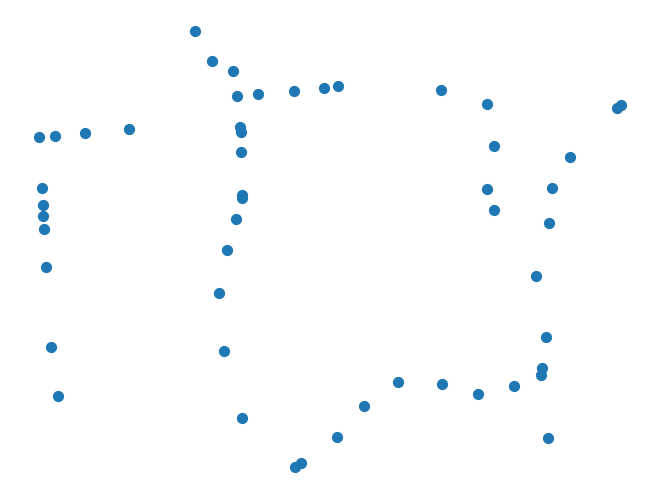

In [15]:
G = nx.Graph()
for i in range(df_node_SF.shape[0]):
    nodeName = df_node_SF.loc[i][0]
    nodeLong = df_node_SF.loc[i][1]
    nodeLat = df_node_SF.loc[i][2]
    G.add_node(nodeName, pos=(nodeLong, nodeLat))

nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=False, node_size=50)
